# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('kc_house_data_train.csv', index_col = 0)
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [2]:
train_df['type'] = 'train'
test_df = pd.read_csv('kc_house_data_test_features.csv', index_col = 0)
test_df['type'] = 'test'

In [3]:
test_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,...,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,test
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,...,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,test
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,...,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,test
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,...,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,test
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,...,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [4]:
result = pd.concat([train_df, test_df])
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
4319,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
4320,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
4321,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [5]:
result.reset_index(inplace=True, drop=True)

In [6]:
result

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test


In [7]:
import seaborn as sns

# sns.pairplot(result)

In [8]:
result.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'type'],
      dtype='object')

In [26]:
_eda = result[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_built','type', 'lat', 'long']]

In [27]:
_eda

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,type,lat,long
0,4,2.25,2070,2.0,0,0,4,8,1986,train,47.4388,-122.162
1,5,3.00,2900,1.0,0,0,5,8,1977,train,47.6784,-122.285
2,4,2.50,3770,2.0,0,2,3,11,1997,train,47.5646,-122.129
3,3,3.50,4560,2.0,0,2,3,12,1990,train,47.6995,-122.228
4,3,2.50,2550,2.0,0,0,3,9,2004,train,47.6647,-122.083
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,2009,test,47.6993,-122.346
21609,4,2.50,2310,2.0,0,0,3,8,2014,test,47.5107,-122.362
21610,2,0.75,1020,2.0,0,0,3,7,2009,test,47.5944,-122.299
21611,3,2.50,1600,2.0,0,0,3,8,2004,test,47.5345,-122.069


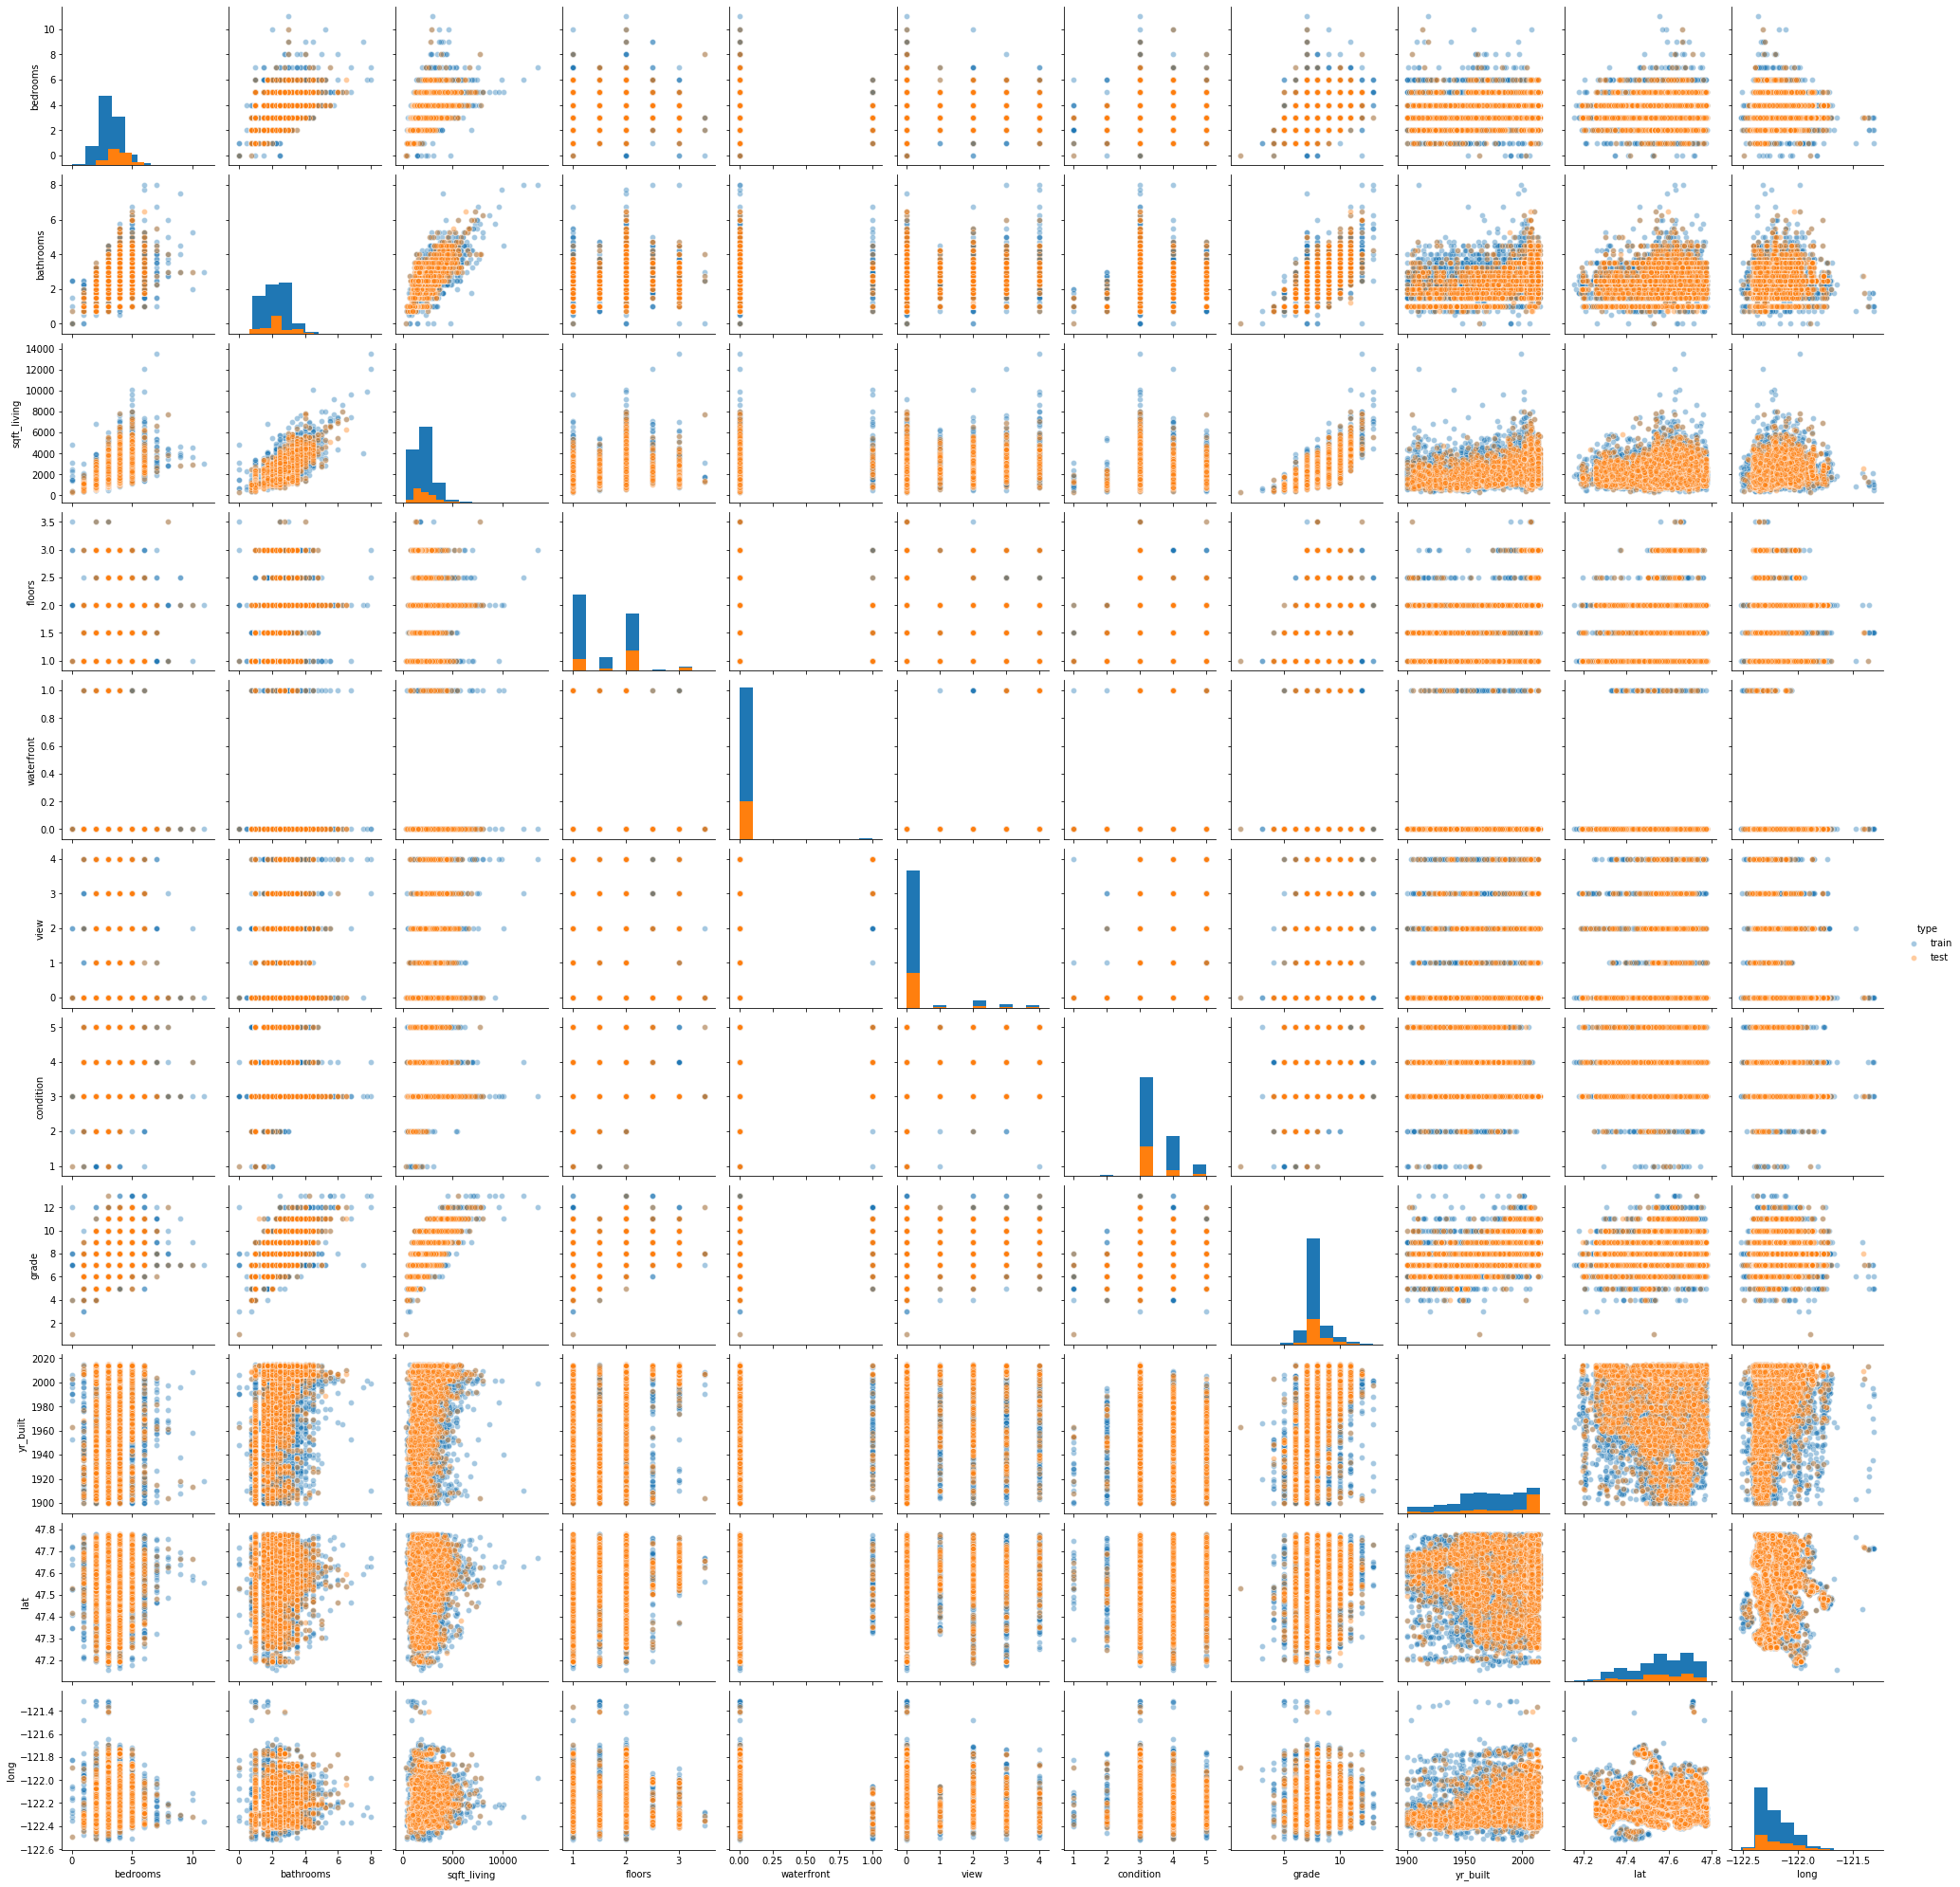

In [28]:
sns.pairplot(_eda,hue="type", diag_kind='hist', plot_kws={'alpha': 0.4})

In [12]:
_eda.corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
bedrooms,1.000000,0.509246,0.583102,0.151275,-0.011546,0.075099,0.022775,0.356476,0.149723
bathrooms,0.509246,1.000000,0.750388,0.492021,0.057061,0.178478,-0.143062,0.667087,0.518033
sqft_living,0.583102,0.750388,1.000000,0.322014,0.100286,0.276005,-0.066840,0.758381,0.313348
floors,0.151275,0.492021,0.322014,1.000000,0.016501,0.007585,-0.285935,0.451652,0.524093
waterfront,-0.011546,0.057061,0.100286,0.016501,1.000000,0.408881,0.015409,0.084644,-0.031393
view,0.075099,0.178478,0.276005,0.007585,0.408881,1.000000,0.050295,0.241013,-0.060997
condition,0.022775,-0.143062,-0.066840,-0.285935,0.015409,0.050295,1.000000,-0.153458,-0.389211
grade,0.356476,0.667087,0.758381,0.451652,0.084644,0.241013,-0.153458,1.000000,0.454955
yr_built,0.149723,0.518033,0.313348,0.524093,-0.031393,-0.060997,-0.389211,0.454955,1.000000


In [13]:
abs(_eda.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built
bedrooms,True,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,False
floors,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False
view,False,False,False,False,False,True,False,False,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,True,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [14]:
_df = _eda.corr().abs().stack().reset_index().sort_values(0, ascending=False)
_df['pairs'] = list(zip(_df.level_0, _df.level_1))
_df.set_index(['pairs'], inplace=True)
_df.drop(columns =['level_1', 'level_0'], inplace=True)
_df.columns = ['cc']
_df.drop_duplicates(inplace=True)
_df[(_df.cc>.75) & (_df.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.758381
"(bathrooms, sqft_living)",0.750388


In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
result['year'] = result['date'].apply(lambda x: x[:4]).astype('int64')
result['month'] = result['date'].apply(lambda x: x[4:6]).astype('int64')


In [17]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
result.drop(['date'], axis = 1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,...,1986,0,98058,47.4388,-122.162,2390,7700,train,2014,10
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,...,1977,0,98115,47.6784,-122.285,2370,6283,train,2014,8
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,...,1997,0,98006,47.5646,-122.129,3710,9685,train,2014,8
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,...,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,...,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,NaN,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5
21609,6600060120,NaN,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,test,2015,2
21610,1523300141,NaN,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,test,2014,6
21611,291310100,NaN,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,test,2015,1


In [19]:
result['price_sqft'] = result['price']/result['sqft_living']

In [56]:
result[['sqft_living', 'price']][~np.isnan(result['price'])].corr()

,sqft_living,price
sqft_living,1.00000,0.70354
price,0.70354,1.00000


In [21]:
result['sqft_lot'].max()

1651359

In [22]:
result.loc[result['sqft_lot'].gt(1000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft
718,1020069017,20150327T000000,700000.0,4,1.00,1300,1651359,1.0,0,3,...,0,98022,47.2313,-122.023,2560,425581,train,2015,3,538.461538
11616,3326079016,20150504T000000,190000.0,2,1.00,710,1164794,1.0,0,0,...,0,98014,47.6888,-121.909,1680,16730,train,2015,5,267.605634
13460,2623069031,20140521T000000,542500.0,5,3.25,3010,1074218,1.5,0,0,...,0,98027,47.4564,-122.004,2450,68825,train,2014,5,180.232558
16243,2323089009,20150119T000000,855000.0,4,3.50,4030,1024068,2.0,0,0,...,0,98045,47.4619,-121.744,1830,11700,train,2015,1,212.158809
17319,3326079016,20150504T000000,NaN,2,1.00,710,1164794,1.0,0,0,...,0,98014,47.6888,-121.909,1680,16730,test,2015,5,NaN


In [48]:
result.loc[result['bedrooms'].eq(3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft,age,reno_age
3,9522300010,20150331T000000,1490000.0,3,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3,326.754386,30,0.0
4,9510861140,20140714T000000,711000.0,3,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7,278.823529,16,0.0
7,7010701383,20141017T000000,680000.0,3,2.5,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400,train,2014,10,377.777778,50,0.0
8,291310170,20140804T000000,384500.0,3,2.5,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288,train,2014,8,240.312500,15,0.0
10,6840701125,20150422T000000,638000.0,3,1.0,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400,train,2015,4,348.633880,90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,NaN,3,2.5,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,test,2014,8,NaN,17,0.0
21604,9834201367,20150126T000000,NaN,3,2.0,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,test,2015,1,NaN,6,0.0
21607,2997800021,20150219T000000,NaN,3,2.5,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,test,2015,2,NaN,12,0.0
21608,263000018,20140521T000000,NaN,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5,NaN,11,0.0


In [53]:
pd.get_dummies(result['view'])

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
21608,1,0,0,0,0
21609,1,0,0,0,0
21610,1,0,0,0,0
21611,1,0,0,0,0


In [54]:
pd.get_dummies(result, columns = ['view'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,type,year,month,price_sqft,age,reno_age,view_0,view_1,view_2,view_3,view_4
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,train,2014,10,176.328502,34,0.0,1,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,train,2014,8,298.275862,43,0.0,1,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,train,2014,8,275.331565,23,0.0,0,0,1,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,train,2015,3,326.754386,30,0.0,0,0,1,0,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,train,2014,7,278.823529,16,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,NaN,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,test,2014,5,NaN,11,0.0,1,0,0,0,0
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,test,2015,2,NaN,6,0.0,1,0,0,0,0
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,test,2014,6,NaN,11,0.0,1,0,0,0,0
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,test,2015,1,NaN,16,0.0,1,0,0,0,0


In [24]:
result.loc[8597,'bedrooms'] = 3

In [34]:
result['age'] = 2020 - result['yr_built']

In [51]:
result['reno_age'] = np.where((result.yr_renovated.isnull), 0, result.reno_age)

In [52]:
result.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,price_sqft,age,reno_age
id,1.000000,-0.015644,-0.000155,0.005415,-0.013709,-0.126388,0.021551,0.000698,0.010183,-0.018504,0.005744,-0.011186,-0.007566,0.016499,-0.017410,-0.004973,-0.000444,0.023649,0.000356,-0.135284,0.011684,-0.015061,-0.001959,-0.016499,NaN
price,-0.015644,1.000000,0.313775,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,-0.002334,-0.004350,0.557401,-0.056450,NaN
bedrooms,-0.000155,0.313775,1.000000,0.522354,0.597992,0.028934,0.156409,-0.011691,0.077377,0.019437,0.366008,0.504787,0.297357,0.154695,0.013903,-0.164550,-0.014384,0.144638,0.414986,0.028063,-0.007868,-0.000376,-0.206218,-0.154695,NaN
bathrooms,0.005415,0.524335,0.522354,1.000000,0.750388,0.078552,0.492021,0.057061,0.178478,-0.143062,0.667087,0.685755,0.271928,0.518033,0.039254,-0.203897,0.022335,0.221714,0.559684,0.081778,-0.025572,0.007157,-0.085434,-0.518033,NaN
sqft_living,-0.013709,0.703540,0.597992,0.750388,1.000000,0.162483,0.322014,0.100286,0.276005,-0.066840,0.758381,0.883291,0.421524,0.313348,0.045229,-0.212131,0.044326,0.251090,0.757094,0.179669,-0.030147,0.012069,-0.083806,-0.313348,NaN
sqft_lot,-0.126388,0.086803,0.028934,0.078552,0.162483,1.000000,-0.022865,0.016157,0.077316,-0.004970,0.099169,0.171932,0.013535,0.030283,0.004530,-0.128612,-0.081060,0.227143,0.127570,0.704779,0.008497,-0.003290,-0.029611,-0.030283,NaN
floors,0.021551,0.256985,0.156409,0.492021,0.322014,-0.022865,1.000000,0.016501,0.007585,-0.285935,0.451652,0.486536,-0.255180,0.524093,-0.013096,-0.046247,0.059716,0.101193,0.247413,-0.029246,-0.021716,0.016279,0.004718,-0.524093,NaN
waterfront,0.000698,0.275779,-0.011691,0.057061,0.100286,0.016157,0.016501,1.000000,0.408881,0.015409,0.084644,0.068475,0.081163,-0.031393,0.100528,0.032881,-0.013871,-0.041388,0.085658,0.027105,0.000520,0.002550,0.201687,0.031393,NaN
view,0.010183,0.395485,0.077377,0.178478,0.276005,0.077316,0.007585,0.408881,1.000000,0.050295,0.241013,0.157029,0.284164,-0.060997,0.095737,0.085162,0.005030,-0.072777,0.270904,0.079108,0.001459,-0.006822,0.224091,0.060997,NaN
condition,-0.018504,0.036099,0.019437,-0.143062,-0.066840,-0.004970,-0.285935,0.015409,0.050295,1.000000,-0.153458,-0.163510,0.173896,-0.389211,-0.050060,0.011035,-0.007335,-0.106745,-0.094033,0.003408,-0.043002,0.016567,0.107385,0.389211,NaN


In [57]:
train_df['price_sqft'] = train_df['price']/train_df['sqft_living']

In [58]:
train_df[['sqft_living', 'price']][~np.isnan(train_df['price'])].corr()

,sqft_living,price
sqft_living,1.00000,0.70354
price,0.70354,1.00000


In [60]:
train_df[['price_sqft', 'price']][~np.isnan(train_df['price'])].corr()

,price_sqft,price
price_sqft,1.000000,0.557401
price,0.557401,1.000000


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [8]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [9]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [10]:
#your code here 

### Non-linear transformations

### 4.4) Create a polynomial feature for two of your continuous variables


In [11]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [12]:
# your code here

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

### 5.1) Perform a train test split of the data.

In [13]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [14]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [15]:
#your code here 

### 5.4) Fit the model to the training data.

In [16]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [17]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [18]:
#your code here 

### 5.7) Determine if your model is overfit.

In [19]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [20]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [21]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/